In [1]:
import os

In [14]:
os.chdir('/content/drive/My Drive')

In [3]:
!ls

'Centro de Controle - Siemens_files'	 meStuff
'Colab Notebooks'			 Projects.ipynb
 DevSetUp				 Projetos
 Entropicai-master			 Teste.docx
 google-vision-api-for-ocr-demo-master


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# load image
img = cv2.imread('imagem-e1536873662306.jpg')

# convert to graky
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold input image as mask
mask = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)[1]

# negate mask
mask = 255 - mask

# apply morphology to remove isolated extraneous noise
# use borderconstant of black since foreground touches the edges
kernel = np.ones((3,3), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# anti-alias the mask -- blur then stretch
# blur alpha channel
mask = cv2.GaussianBlur(mask, (0,0), sigmaX=2, sigmaY=2, borderType = cv2.BORDER_DEFAULT)

# linear stretch so that 127.5 goes to 0, but 255 stays 255
mask = (2*(mask.astype(np.float32))-255.0).clip(0,255).astype(np.uint8)

# put mask into alpha channel
result = img.copy()
result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
result[:, :, 3] = mask

# save resulting masked image
cv2.imwrite('person_transp_bckgrnd.png', result)

# display result, though it won't show transparency
cv2_imshow(result)
# cv2_imshow(gray)
# cv2_imshow("MASK", mask)
# cv2_imshow("RESULT", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

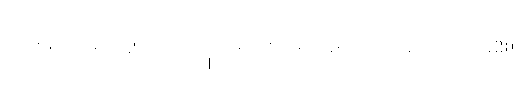

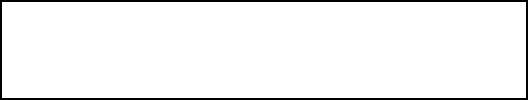

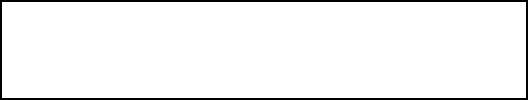

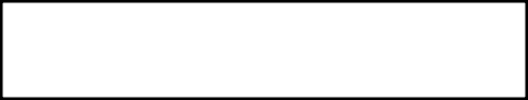

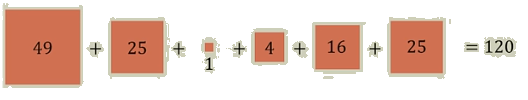

In [ ]:
import cv2
import numpy as np
import skimage.exposure
from google.colab.patches import cv2_imshow

# load image
img = cv2.imread('/content/drive/MyDrive/Projetos/Concepts/linearRegretion/2.png')

# convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold
thresh = cv2.threshold(gray, 11, 255, cv2.THRESH_BINARY)[1]

# apply morphology to clean small spots
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
morph = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, borderType=cv2.BORDER_CONSTANT, borderValue=0)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
morph = cv2.morphologyEx(morph, cv2.MORPH_CLOSE, kernel, borderType=cv2.BORDER_CONSTANT, borderValue=0)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
morph = cv2.morphologyEx(morph, cv2.MORPH_ERODE, kernel, borderType=cv2.BORDER_CONSTANT, borderValue=0)

# get external contour
contours = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
big_contour = max(contours, key=cv2.contourArea)

# draw white filled contour on black background as mas
contour = np.zeros_like(gray)
cv2.drawContours(contour, [big_contour], 0, 255, -1)

# blur dilate image
blur = cv2.GaussianBlur(contour, (5,5), sigmaX=0, sigmaY=0, borderType = cv2.BORDER_DEFAULT)

# stretch so that 255 -> 255 and 127.5 -> 0
mask = skimage.exposure.rescale_intensity(blur, in_range=(127.5,255), out_range=(0,255))

# put mask into alpha channel of input
result = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
result[:,:,3] = mask

# save output
#cv2.imwrite('aerial_image_thresh.png', thresh)
#cv2.imwrite('aerial_image_morph.png', morph)
#cv2.imwrite('aerial_image_contour.png', contour)
#cv2.imwrite('aerial_image_mask.png', mask)
#cv2.imwrite('aerial_image_antialiased.png', result)


# Display various images to see the steps
cv2_imshow(thresh)
cv2_imshow(morph)
cv2_imshow(contour)
cv2_imshow(mask)
cv2_imshow(result)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
import cv2
import numpy as np
import skimage.exposure
from google.colab.patches import cv2_imshow

In [22]:
#placas = ['pla_sara01.jpg', 'placa_sara02.jpg']

def imagr(image):
  # Load image, convert to grayscale, Gaussian blur, Otsu's threshold
  image = cv2.imread(image01)
  original = image.copy()
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  blur = cv2.GaussianBlur(gray, (3,3), 0)
  thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

  # Obtain bounding rectangle and extract ROI
  x,y,w,h = cv2.boundingRect(thresh)
  cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
  ROI = original[y:y+h, x:x+w]

  # Add alpha channel
  b,g,r = cv2.split(ROI)
  alpha = np.ones(b.shape, dtype=b.dtype) * 50
  ROI = cv2.merge([b,g,r,alpha])

  cv2_imshow(thresh)
  cv2_imshow(image)
  cv2_imshow(ROI)
  cv2.waitKey()

# for i in placas:
# image = cv2.imread(i)
image01 = cv2.imread('/content/drive/MyDrive/placa_sara02.jpg')
imagr(image01)



SystemError: ignored

In [ ]:
image = cv2.imread(placas[1])
imagr(image)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
image = cv2.imread(placas[2])
imagr(image)

Output hidden; open in https://colab.research.google.com to view.

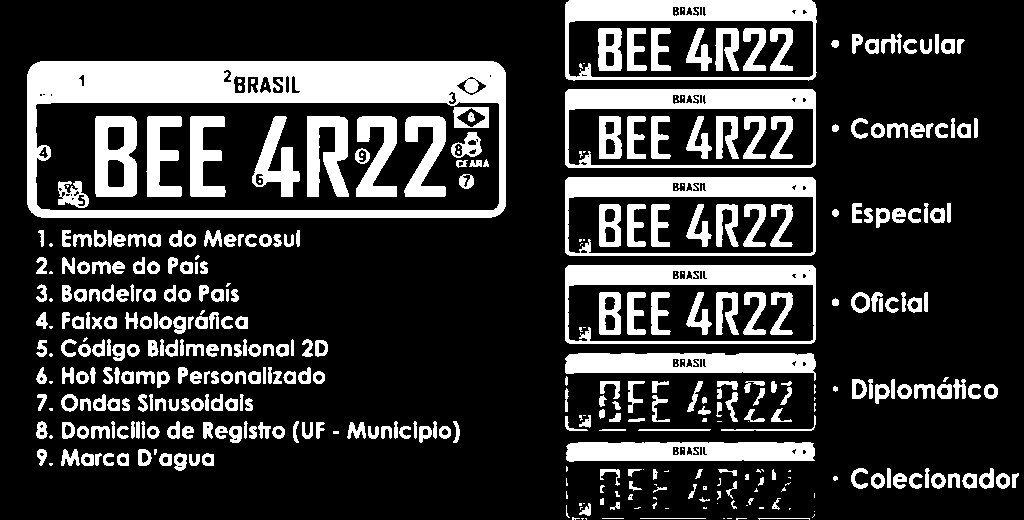

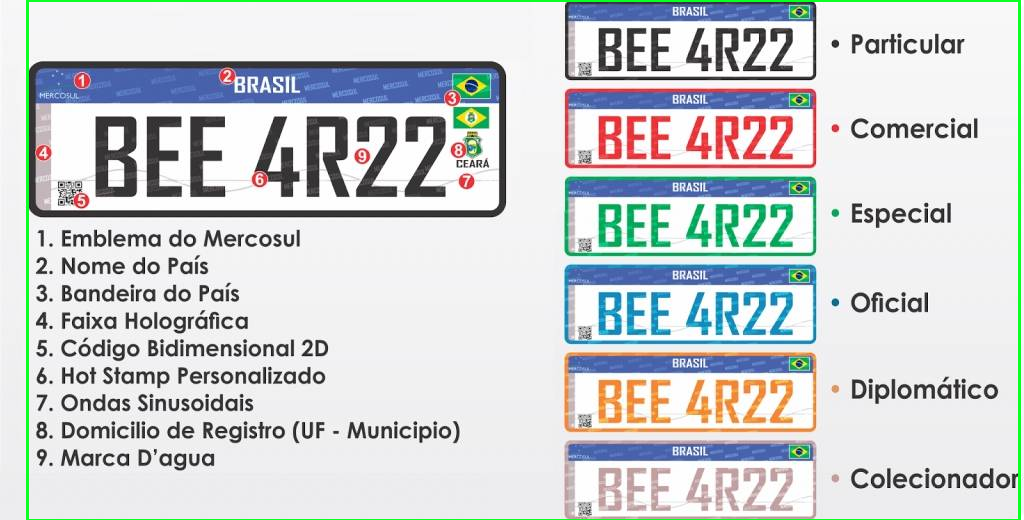

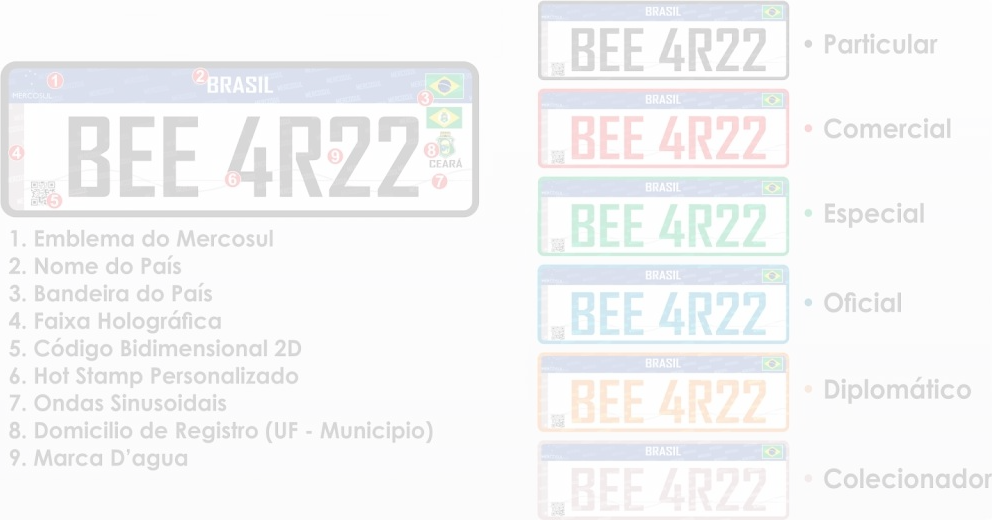

In [ ]:
image = cv2.imread(placas[4])
imagr(image)